In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
# create moon shaped dataset
from sklearn.datasets import make_moons, make_classification
moon =make_moons(noise=0.3, random_state=0)
features,labels=moon
print(features)
print(labels)


[[ 0.03159499  0.98698776]
 [ 2.11509784 -0.04624397]
 [ 0.88248972 -0.07575606]
 [-0.0551441  -0.03733246]
 [ 0.82954503 -0.53932149]
 [ 2.11285708  0.66208353]
 [ 0.5696927   0.33744136]
 [ 0.95217454 -0.75307471]
 [-0.02922115  0.39287336]
 [ 1.71579557  0.36069454]
 [-0.27883014  0.61420539]
 [ 2.00344509 -0.3091496 ]
 [ 1.50009616 -0.74636376]
 [ 1.22540835  1.19793017]
 [ 0.46730819  0.54703192]
 [-0.36653222  1.11971633]
 [ 0.30124459  1.23315697]
 [ 0.30430746  0.82373935]
 [-0.23712492  0.77876034]
 [ 1.16339832  0.55290238]
 [-0.59702417  0.6572361 ]
 [ 0.46356735 -0.1951543 ]
 [ 0.68451111  0.75287685]
 [ 0.70515699 -0.45892444]
 [-0.65805008 -0.12944211]
 [-0.74662946 -0.3829632 ]
 [ 0.60585226  0.31252842]
 [ 2.18137168 -0.02291747]
 [ 1.91980633  0.17247329]
 [ 1.4834364  -0.10517023]
 [ 0.47404723 -0.14575067]
 [ 1.05614605 -1.03570207]
 [ 1.86500732 -0.01107874]
 [ 0.4194721  -0.32478101]
 [ 0.06873258  0.56648467]
 [-0.17332432  1.00215131]
 [ 0.12412421  1.00062892]
 

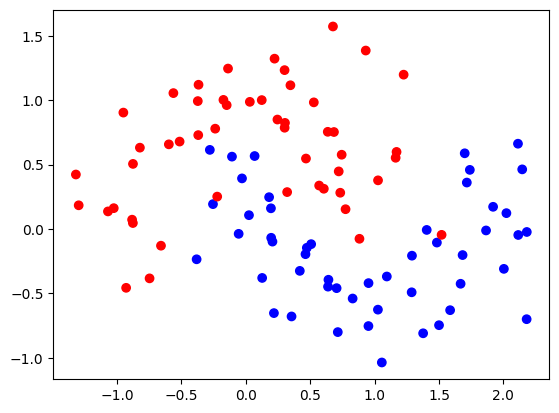

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
h = .02 # step size in the mesh
X, y=features,labels
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4,random_state=42)
colors=["red","blue"]
plt.scatter(features[:,0],features[:,1],color=[colors[idx] for idx in labels])
plt.show()


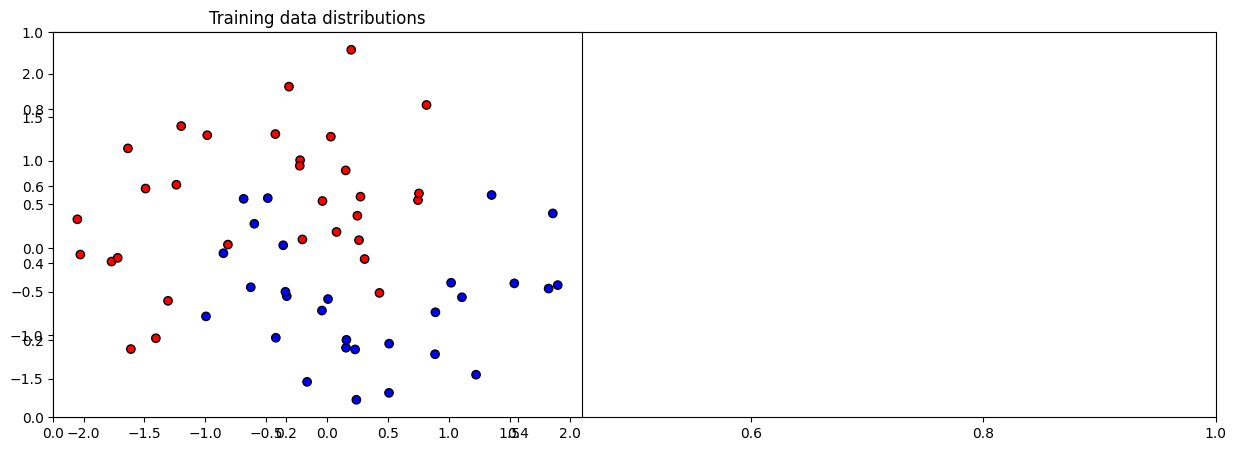

In [3]:
 # just plot the dataset first
from matplotlib.colors import ListedColormap
plt.subplots(figsize = (15,5))
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(1, 2, 1)
ax.set_title("Training data distributions")
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,edgecolors='k')

In [4]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=3,random_state=12,activation='logistic',max_iter=500)
clf.fit(X_train, y_train)


MLPClassifier(activation='logistic', alpha=1e-05, hidden_layer_sizes=3,
              max_iter=500, random_state=12, solver='lbfgs')

In [5]:
# neuro weights without considering bias
print(clf.coefs_)
# neron bias weights
print(clf.intercepts_)

[array([[ -17.10253365,   91.93483007,  -29.56765036],
       [  18.84384301, -132.32900727,   91.93347684]]), array([[-26.38551692],
       [ 27.06402433],
       [-21.51283071]])]
[array([ 24.8398725 , 143.68603567,  66.04721441]), array([20.52369701])]


In [6]:
def findSlopeIntercept(coefs,bias):
    hidden_wts=coefs[0]
    bias_wts=bias[0]
    num=len(hidden_wts[0])
    slopIntercept=[]
    for i in range(num):
        w=[bias_wts[i],hidden_wts[0,i],hidden_wts[1,i]]
        slope=w[1]/w[2]*(-1)
        intercept=w[0]/w[2]*(-1)
        slopIntercept.append([slope,intercept])
    return(slopIntercept)


In [7]:
slopeIntercept= findSlopeIntercept(clf.coefs_,clf.intercepts_)
slopeIntercept


[[0.9075926625266195, -1.3181956827344319],
 [0.6947443494810721, 1.085824178971307],
 [0.32162006031122775, -0.7184239809057759]]

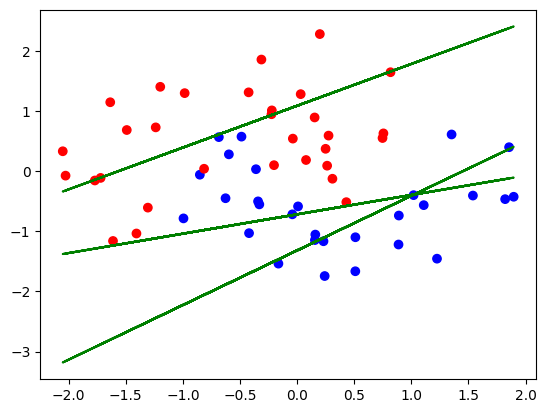

In [8]:
colors=["red","blue"]
xvalues=X_train[:,0]
plt.scatter(X_train[:,0],X_train[:,1],color=[colors[idx] for idx in y_train])
num=len(slopeIntercept)
for i in range(num):
    yvalues=xvalues*slopeIntercept[i][0]+slopeIntercept[i][1]
    plt.plot(xvalues,yvalues,"g-")
plt.show()



[]

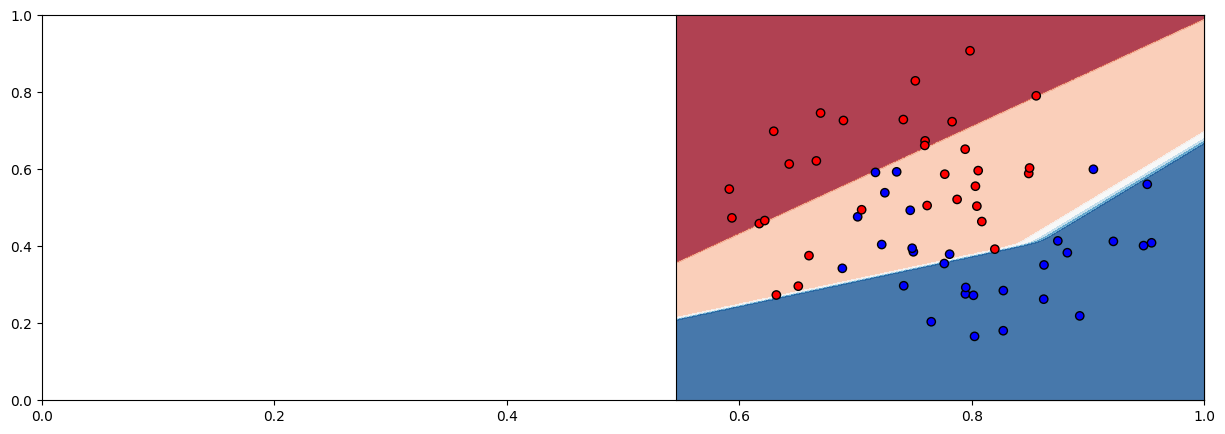

In [9]:
 # Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
plt.subplots(figsize = (15,5))
ax = plt.subplot(1, 2, 2)
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())



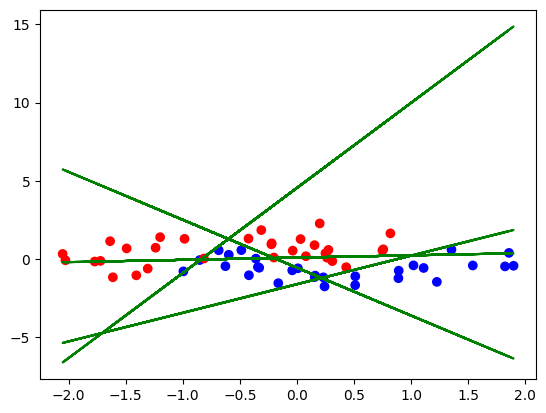

In [10]:
 # now increase to 4 hidden nodes
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=4,random_state=12,activation='logistic',max_iter=500)
clf.fit(X_train, y_train)
slopeIntercept=findSlopeIntercept(clf.coefs_,clf.intercepts_)
plt.scatter(X_train[:,0],X_train[:,1],color=[colors[idx] for idx in y_train])
num=len(slopeIntercept)
for i in range(num):
    yvalues=xvalues*slopeIntercept[i][0]+slopeIntercept[i][1]
    plt.plot(xvalues,yvalues,"g-")
plt.show()


Text(0.5, 1.0, 'Multi Layer Neural Network')

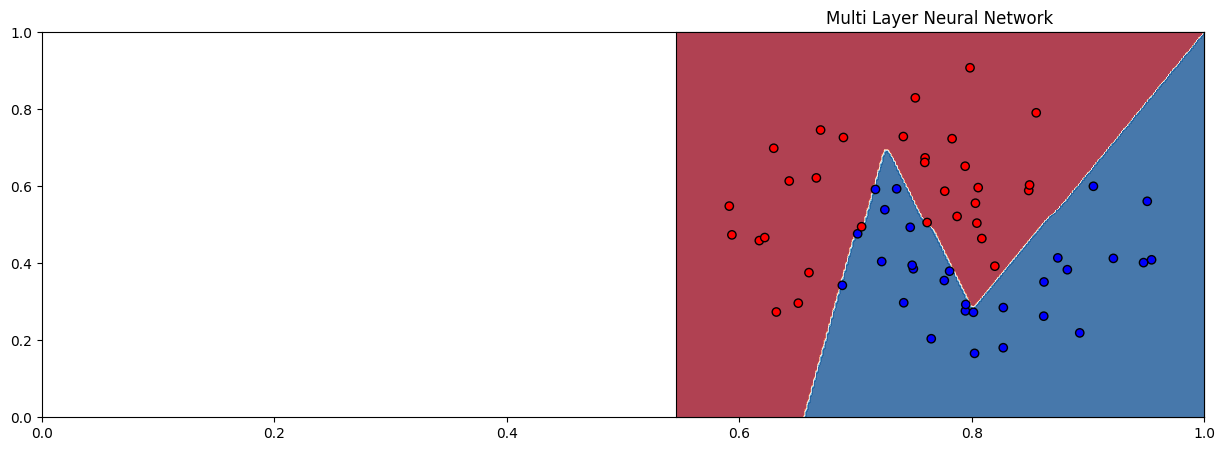

In [11]:
 # Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
plt.subplots(figsize = (15,5))
ax = plt.subplot(1, 2, 2)
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Multi Layer Neural Network')


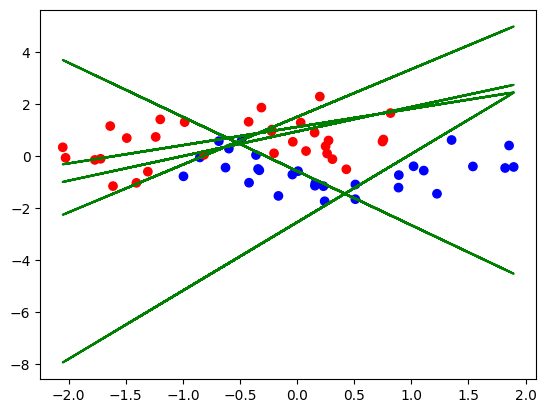

In [12]:
# now increase to 5 hidden nodes. As we add more hidden nodes, the model is becoming more complex
# and therefore, have a higher risk of overfitting
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=5,random_state=12,activation='logistic',max_iter=500)
clf.fit(X_train, y_train)
slopeIntercept=findSlopeIntercept(clf.coefs_,clf.intercepts_)
plt.scatter(X_train[:,0],X_train[:,1],color=[colors[idx] for idx in y_train])
num=len(slopeIntercept)
for i in range(num):
    yvalues=xvalues*slopeIntercept[i][0]+slopeIntercept[i][1]
    plt.plot(xvalues,yvalues,"g-")
plt.show()


Text(0.5, 1.0, 'Multi Layer Neural Network')

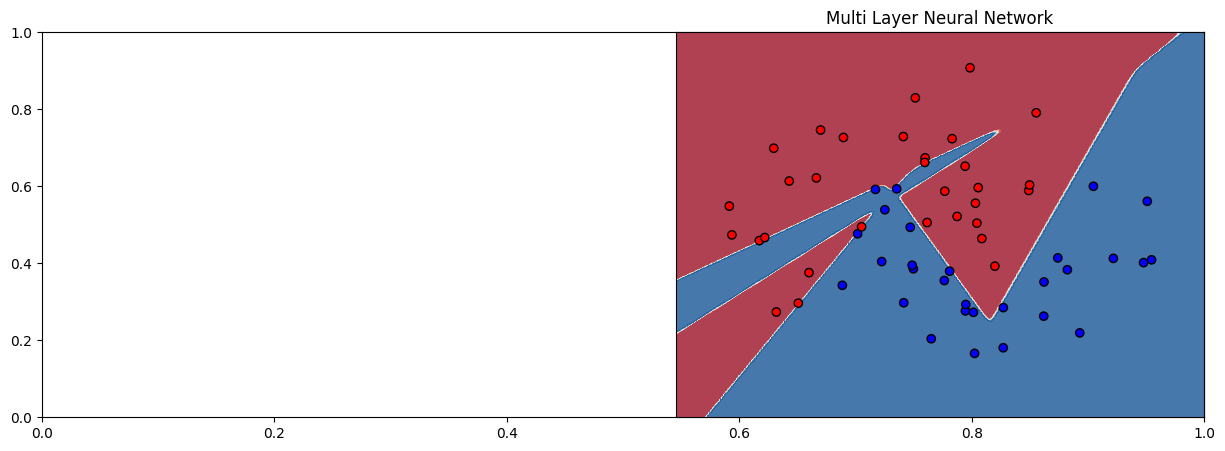

In [13]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
plt.subplots(figsize = (15,5))
ax = plt.subplot(1, 2, 2)
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Multi Layer Neural Network')


In [16]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()
data = olivetti.data
target = olivetti.target

# Since the data from fetch_olivetti_faces is already flattened, you might want to reshape it to visualize
images = data.reshape((400, 64, 64))

print(data.shape)  # Should print (400, 4096) since it's flattened
print(target.shape)  # Should print (400,)
print(target)


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/isabellaw/scikit_learn_data
(400, 4096)
(400,)
[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26
 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 

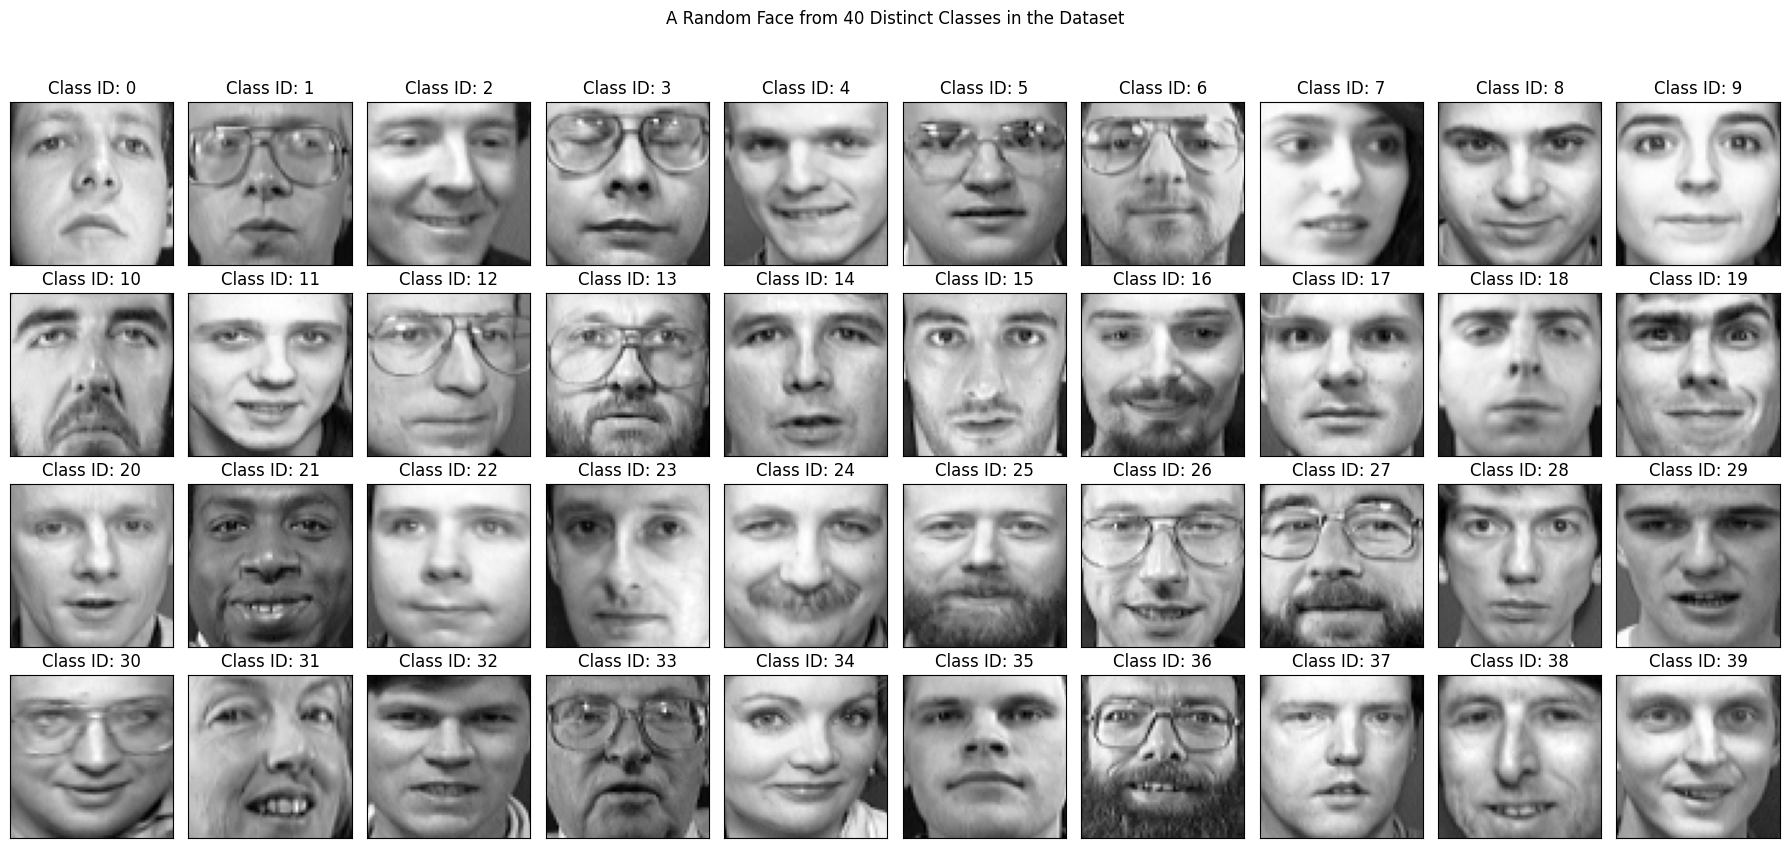

In [19]:
import matplotlib.pyplot as plt
import numpy as np

def show_a_random_face_per_class(images, unique_ids):
    fig, axarr = plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    axarr = axarr.flatten()
    
    rand_indices = np.random.randint(0, 10, size=len(unique_ids))
    
    for idx, unique_id in enumerate(unique_ids):
        image_index = unique_id * 10 + rand_indices[idx]
        
        image_2d = images[image_index].reshape(64, 64)
        
        axarr[idx].imshow(image_2d, cmap='gray')
        axarr[idx].set_xticks([])
        axarr[idx].set_yticks([])
        axarr[idx].set_title("Class ID: {}".format(unique_id))
    
    plt.suptitle("A Random Face from 40 Distinct Classes in the Dataset")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

show_a_random_face_per_class(data, np.unique(target))



In [22]:
X = data.reshape((data.shape[0], -1))  # -1 tells numpy to calculate the size of this dimension
print(X.shape)


(400, 4096)


In [23]:
 # now we slpilt training and test data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, target, test_size=0.4,stratify=target, random_state=1)
print(X_train.shape)
print(X_test.shape)


(240, 4096)
(160, 4096)


In [24]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10,), random_state=42,activation='logistic',max_iter=1000)
clf.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='logistic', hidden_layer_sizes=(10,), max_iter=1000,
              random_state=42, solver='lbfgs')

In [25]:
y_pred=clf.predict(X_test)
print(y_test)
print(y_pred)


[19 19 17  2 27 14 13  9 37 21 35 39 39 13 35  3 31 19 20 16 29  9 13 30
 20 11 34  5 15 25 14 23 22 18  2 38 35 24  2 30  5 12 12  7 33 15  4 16
  4 11  0  7 39 34  0 26 30 38 22 26  1 13 24 36 17 27 14 10 28 39 38 32
 15  8 11 25 28 20 10  4  6 10 18  9  0 35 34 18  8 16 16 12 28 18  7 25
  7 37 31 21 29  6 21  9  3  0 33 26  6 27 17 23 33 24 38 32 12 37 15  1
  1 34 31 14  8 33 31  1 10 22 17 19 30 36 29  5 23  8  5 36 32  6  3 29
 20 24 32 22 26  4 36 25 27 37 28 11 21  3 23  2]
[29 29 29 13 31 13 31 13 13 31 35 29 13 13  6  6 31  5 13  6 29 13 31 21
 29  6 13 29 31 31 13 29 31 31 29 13 29 13 29  1 29 13  1 13 13 29 29  6
 29 31 29 13 29 29 29 31 29 13 31 31 13 31 13 31 29 13 13 31 29 29 29 29
 29 29 31 31 13 29 31 29  6 31 31 29 13 29 13 31 35 31  6 29 29 31 29 31
 13 13 31 13 29  6 13 13 31  6 13 31  6 31 29  6 13 13 13 29 29 29 29 13
 13 29 31 30 29 13 31 13 31 31 29 35 13 13 13 29  6  6 29 31 29  6 29 29
 29 13 29 31 31 29 31 13 31 29 29  6 13 13 13 13]


In [26]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, y_pred)
cf


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [27]:
# use scikit-learn to calculate accuracy.
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.08125

In [28]:
 # K fold cross-validation
from sklearn.model_selection import KFold

y = target
kf = KFold(n_splits=3,shuffle=True)
# Returns the number of splitting iterations in the cross-validator
kf.get_n_splits(X)
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [  1   3   8  13  14  15  17  19  20  21  22  23  24  25  27  29  31  34
  35  36  43  46  48  49  51  54  55  56  58  59  60  62  63  64  66  67
  68  69  71  72  74  75  77  78  80  81  82  83  84  86  88  89  90  91
  94  96  97  98  99 100 101 102 104 105 107 108 111 112 113 114 115 116
 117 118 119 120 121 123 124 125 126 127 128 130 131 132 133 134 135 137
 138 140 141 142 143 146 148 149 151 152 153 154 159 160 163 164 166 167
 168 169 170 171 172 173 174 176 177 178 180 181 186 187 188 189 190 192
 197 198 200 203 204 205 206 207 209 211 212 213 214 216 217 218 219 220
 221 223 224 225 226 229 231 233 234 236 237 238 239 241 242 243 245 247
 248 249 252 253 254 255 256 257 258 259 260 262 263 264 266 268 269 270
 271 272 273 274 275 276 277 278 279 280 286 288 290 293 294 295 296 297
 298 299 300 301 302 304 306 311 313 314 315 316 317 319 320 322 324 325
 326 328 330 331 332 333 335 336 337 339 341 342 343 347 348 349 350 352
 353 354 355 356 357 358 359 361 363 364 365

In [34]:
# now compare k-fold cross validation accuracies between two models
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree 
y=target
kf = KFold(n_splits=10,shuffle=True) 
kf.get_n_splits(X)
Acc1 = [] 
Acc2 = []
Acc3 = []
Acc4 = []

kf.get_n_splits(X)   

for train_index, test_index in kf.split(X): 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf1 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10,), random_state=42,activation='logistic',max_iter=1000)
    clf1.fit(X_train, y_train)
    y_pred = clf1.predict(X_test) 
    Acc1.append(accuracy_score(y_test, y_pred))
    
    clf2 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(50,), random_state=42,activation='logistic',max_iter=1000)
    clf2.fit(X_train, y_train)
    y_pred = clf1.predict(X_test) 
    Acc2.append(accuracy_score(y_test, y_pred)) 
    
    clf3 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(500,), random_state=42,activation='logistic',max_iter=1000)
    clf3.fit(X_train, y_train)
    y_pred = clf1.predict(X_test) 
    Acc3.append(accuracy_score(y_test, y_pred))
    
    clf4 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(50,10), random_state=42,activation='logistic',max_iter=1000)
    clf4.fit(X_train, y_train)
    y_pred = clf1.predict(X_test) 
    Acc4.append(accuracy_score(y_test, y_pred))
    
print(Acc1)   
print(Acc2) 
print(Acc3)
print(Acc4)

print("The average accuracy for the 1st Classifier is %.4f" % np.mean(Acc1))
print("The average accuracy for the 2nd Classifier is %.4f" % np.mean(Acc2))
print("The average accuracy for the 2nd Classifier is %.4f" % np.mean(Acc3))
print("The average accuracy for the 2nd Classifier is %.4f" % np.mean(Acc4))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network

[0.05, 0.025, 0.05, 0.0, 0.125, 0.025, 0.0, 0.0, 0.0, 0.0]
[0.05, 0.025, 0.05, 0.0, 0.125, 0.025, 0.0, 0.0, 0.0, 0.0]
[0.05, 0.025, 0.05, 0.0, 0.125, 0.025, 0.0, 0.0, 0.0, 0.0]
[0.05, 0.025, 0.05, 0.0, 0.125, 0.025, 0.0, 0.0, 0.0, 0.0]
The average accuracy for the 1st Classifier is 0.0275
The average accuracy for the 2nd Classifier is 0.0275
The average accuracy for the 2nd Classifier is 0.0275
The average accuracy for the 2nd Classifier is 0.0275


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [35]:
# now compare k-fold cross validation accuracies between two models
from sklearn.metrics import accuracy_score 
from sklearn import tree 
y=target
kf = KFold(n_splits=10,shuffle=True) 
kf.get_n_splits(X)
Acc1 = [] 
 

for train_index, test_index in kf.split(X): 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf1 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10,), random_state=42,activation='logistic',max_iter=3000, verbose=False)
    clf1.fit(X_train, y_train)
    y_pred = clf1.predict(X_test) 
    Acc1.append(accuracy_score(y_test, y_pred))
    
print("The average accuracy of the 1st Classifier is %.4f" % np.mean(Acc1))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network

The average accuracy of the 1st Classifier is 0.0925


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [36]:
# now compare k-fold cross validation accuracies between two models
from sklearn.metrics import accuracy_score 
from sklearn import tree 
y=target
kf = KFold(n_splits=10,shuffle=True) 
kf.get_n_splits(X)
Acc2 = [] 
 

for train_index, test_index in kf.split(X): 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf2 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(50,), random_state=42,activation='logistic',max_iter=5000, verbose=False)
    clf2.fit(X_train, y_train)
    y_pred = clf1.predict(X_test) 
    Acc2.append(accuracy_score(y_test, y_pred)) 
  
    
  
print(Acc2)   

print("The average accuracy of the 1st Classifier is %.4f" % np.mean(Acc2))

[0.3, 0.35, 0.275, 0.25, 0.225, 0.3, 0.25, 0.35, 0.275, 0.275]
The average accuracy of the 1st Classifier is 0.2850


In [37]:
# now compare k-fold cross validation accuracies between two models
from sklearn.metrics import accuracy_score 
from sklearn import tree 
y=target
kf = KFold(n_splits=10,shuffle=True) 
kf.get_n_splits(X)
Acc3 = [] 
 

for train_index, test_index in kf.split(X): 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf2 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(500,), random_state=42,activation='logistic',max_iter=5000, verbose=False)
    clf2.fit(X_train, y_train)
    y_pred = clf1.predict(X_test) 
    Acc3.append(accuracy_score(y_test, y_pred)) 

print("The average accuracy of the 1st Classifier is %.4f" % np.mean(Acc3))

The average accuracy of the 1st Classifier is 0.2850


In [38]:
# now compare k-fold cross validation accuracies between two models
from sklearn.metrics import accuracy_score 
from sklearn import tree 
y=target
kf = KFold(n_splits=10,shuffle=True) 
kf.get_n_splits(X)
Acc4 = [] 
 

for train_index, test_index in kf.split(X): 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf4 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(50,10), random_state=42,activation='logistic',max_iter=1000)
    clf4.fit(X_train, y_train)
    y_pred = clf1.predict(X_test) 
    Acc4.append(accuracy_score(y_test, y_pred))
    
print("The average accuracy of the 1st Classifier is %.4f" % np.mean(Acc4))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network

The average accuracy of the 1st Classifier is 0.2850


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
